# Introduction

# Data Cleaning

In [28]:
import seaborn as sns
import sklearn as sk
import pandas as pd
import matplotlib.pyplot as plt

In [29]:
df1 = pd.read_csv('steps.csv', sep=";")
df1.head()

,id,20-6-2013,21-6-2013,22-6-2013,23-6-2013,24-6-2013,25-6-2013,26-6-2013,27-6-2013,28-6-2013,...,4-5-2014,5-5-2014,6-5-2014,7-5-2014,8-5-2014,9-5-2014,10-5-2014,11-5-2014,12-5-2014,13-5-2014
0,1,NaN,NaN,NaN,NaN,3941.0,15733.0,9929.0,12879.0,10541.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,NaN,NaN,10473.0,705.0,4287.0,5507.0,4024.0,3926.0,14595.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,NaN,11428.0,12523.0,2553.0,190.0,2164.0,8185.0,9630.0,8983.0,...,3914.0,4364.0,NaN,NaN,NaN,6227.0,4567.0,2567.0,1129.0,NaN
3,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [30]:
df2 = pd.read_csv('survey.csv')
df2.head()

,id,city,gender,age,hh_size,education,education_1,height,weight
0,1,Bordeaux,Male,25-34,4,4,Master or doctorate,178.0,98.0
1,2,Lille,Male,35-44,1,3,Bachelor,180.0,77.0
2,3,Montpellier,Male,25-34,2,2,Master or doctorate,180.0,83.0
3,4,Lyon,Male,<25,1,1,Bachelor,178.0,80.0
4,5,Montpellier,Female,25-34,3,4,Bachelor,167.0,61.0


In [31]:
df = pd.merge(df1, df2, on = 'id') 
df.head()

,id,20-6-2013,21-6-2013,22-6-2013,23-6-2013,24-6-2013,25-6-2013,26-6-2013,27-6-2013,28-6-2013,...,12-5-2014,13-5-2014,city,gender,age,hh_size,education,education_1,height,weight
0,1,NaN,NaN,NaN,NaN,3941.0,15733.0,9929.0,12879.0,10541.0,...,NaN,NaN,Bordeaux,Male,25-34,4,4,Master or doctorate,178.0,98.0
1,2,NaN,NaN,10473.0,705.0,4287.0,5507.0,4024.0,3926.0,14595.0,...,NaN,NaN,Lille,Male,35-44,1,3,Bachelor,180.0,77.0
2,3,NaN,11428.0,12523.0,2553.0,190.0,2164.0,8185.0,9630.0,8983.0,...,1129.0,NaN,Montpellier,Male,25-34,2,2,Master or doctorate,180.0,83.0
3,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,Lyon,Male,<25,1,1,Bachelor,178.0,80.0
4,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,Montpellier,Female,25-34,3,4,Bachelor,167.0,61.0


In [32]:
df['gemiddelde_stappen']=df.iloc[:, 9:].mean(axis=1)
print(df.head())

   id  20-6-2013  21-6-2013  22-6-2013  23-6-2013  24-6-2013  25-6-2013  \
0   1        NaN        NaN        NaN        NaN     3941.0    15733.0   
1   2        NaN        NaN    10473.0      705.0     4287.0     5507.0   
2   3        NaN    11428.0    12523.0     2553.0      190.0     2164.0   
3   4        NaN        NaN        NaN        NaN        NaN        NaN   
4   5        NaN        NaN        NaN        NaN        NaN        NaN   

   26-6-2013  27-6-2013  28-6-2013  ...  13-5-2014         city  gender  \
0     9929.0    12879.0    10541.0  ...        NaN     Bordeaux    Male   
1     4024.0     3926.0    14595.0  ...        NaN        Lille    Male   
2     8185.0     9630.0     8983.0  ...        NaN  Montpellier    Male   
3        NaN        NaN        NaN  ...        NaN         Lyon    Male   
4        NaN        NaN        NaN  ...        NaN  Montpellier  Female   

     age  hh_size  education          education_1  height  weight  \
0  25-34        4          4 

C:\Users\davel\AppData\Local\Temp\ipykernel_21116\866989988.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df['gemiddelde_stappen']=df.iloc[:, 9:].mean(axis=1)


In [33]:
df.drop(df[df["gemiddelde_stappen"] >= 30000].index, inplace=True)

In [34]:
df.drop(df[df["weight"] >= 300].index, inplace=True)

De NaN values moeten eruit om voorspellingen te maken.

In [35]:
df = df[df['education'].notna()]
df = df[df['height'].notna()]
df = df[df['weight'].notna()]

Voor de makkelijkheid heb ik een subset gecreëerd met alle variabelen met numerieke waardes.

In [36]:
df_subset = df[['education', 'weight','height', 'gemiddelde_stappen']]

# Exploratory Data Analysis

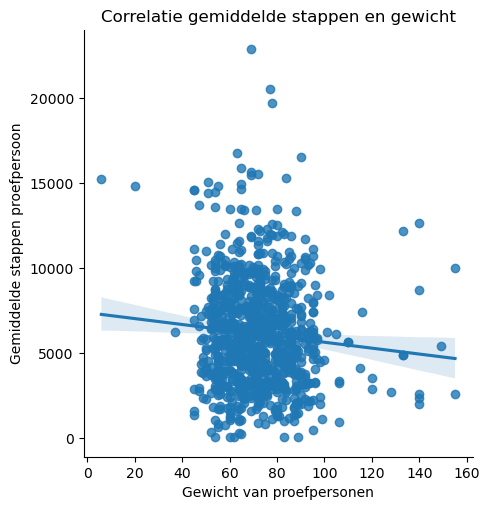

In [37]:
sns.lmplot(x='weight', y='gemiddelde_stappen', data=df)
plt.xlabel('Gewicht van proefpersonen')
plt.ylabel('Gemiddelde stappen proefpersoon')
plt.title('Correlatie gemiddelde stappen en gewicht')
plt.show()

## Make scatter plots for the relations

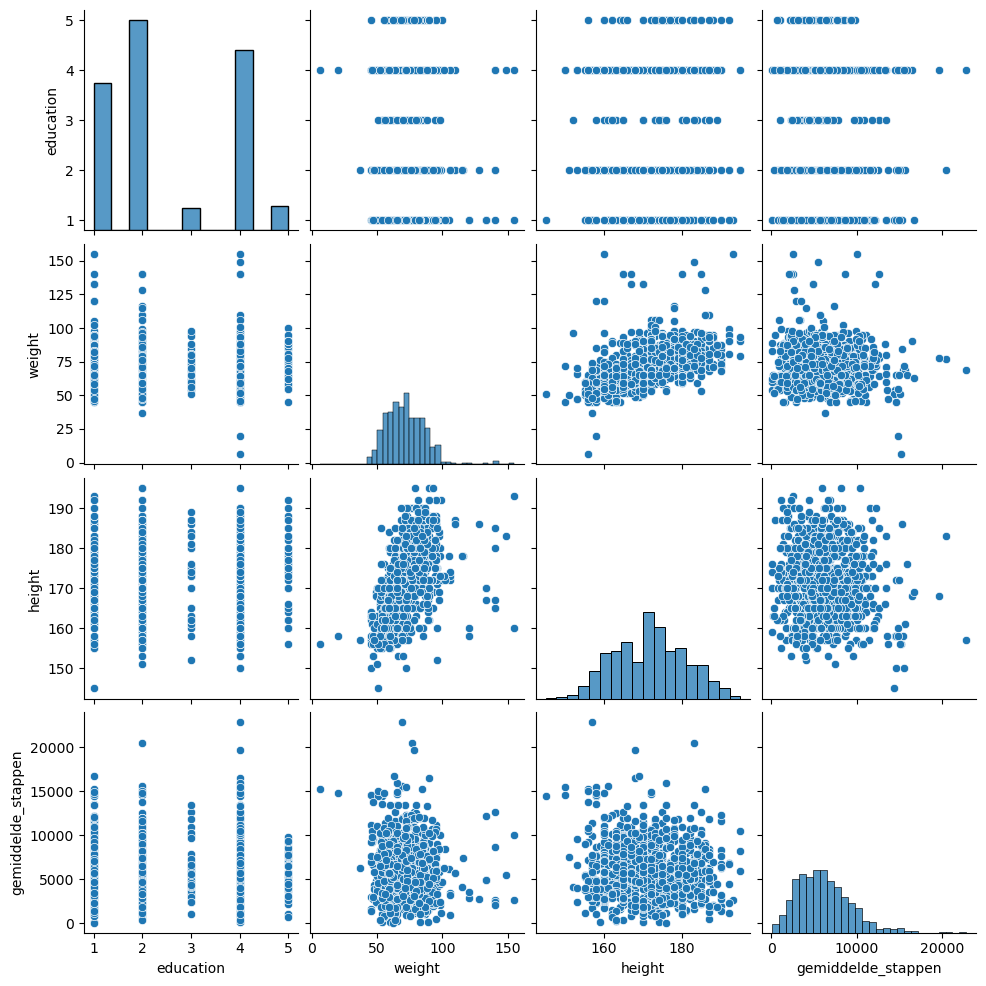

In [38]:
sns.pairplot(df_subset)
plt.show()

## Calculate the correlation

In [39]:
corr = df_subset.corr() #I'm leaving out the corrected variables (divided by 1 million)
corr

,education,weight,height,gemiddelde_stappen
education,1.000000,0.000627,-0.040326,0.026478
weight,0.000627,1.000000,0.514211,-0.086744
height,-0.040326,0.514211,1.000000,-0.066391
gemiddelde_stappen,0.026478,-0.086744,-0.066391,1.000000


Op basis van de berekening en de scatterplots concludeer ik dat er alleen een correlatie is tussen het gewicht en de lengte van de proefpersonen.

# Predictive model

Lineaire regressie is een verband tussen twee eenheden waarbij x de onafhankelijke is.

In [40]:
from sklearn.linear_model import LinearRegression

x = df[['education', 'height', 'weight']] 
y = df['gemiddelde_stappen']
lm = LinearRegression() 
lm = lm.fit(x, y) 

In [41]:
df['gemiddelde_stappen_p'] = lm.predict(x)
df.head(10)

,id,20-6-2013,21-6-2013,22-6-2013,23-6-2013,24-6-2013,25-6-2013,26-6-2013,27-6-2013,28-6-2013,...,city,gender,age,hh_size,education,education_1,height,weight,gemiddelde_stappen,gemiddelde_stappen_p
0,1,NaN,NaN,NaN,NaN,3941.0,15733.0,9929.0,12879.0,10541.0,...,Bordeaux,Male,25-34,4,4,Master or doctorate,178.0,98.0,9949.775758,5775.365225
1,2,NaN,NaN,10473.0,705.0,4287.0,5507.0,4024.0,3926.0,14595.0,...,Lille,Male,35-44,1,3,Bachelor,180.0,77.0,5580.055901,5997.160173
2,3,NaN,11428.0,12523.0,2553.0,190.0,2164.0,8185.0,9630.0,8983.0,...,Montpellier,Male,25-34,2,2,Master or doctorate,180.0,83.0,8153.448276,5847.559497
3,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Lyon,Male,<25,1,1,Bachelor,178.0,80.0,3038.500000,5847.835544
4,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Montpellier,Female,25-34,3,4,Bachelor,167.0,61.0,4949.827586,6418.689855
5,6,NaN,16924.0,14411.0,5121.0,29784.0,8995.0,23336.0,15.0,17075.0,...,Lille,Male,35-44,1,1,Vocational,170.0,63.0,11491.006667,6172.226473
6,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Montpellier,Male,25-34,2,2,Master or doctorate,175.0,75.0,4400.016949,6012.294386
7,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Bordeaux,Female,25-34,3,4,Master or doctorate,165.0,88.0,3366.370968,6047.294231
8,9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Lille,Female,35-44,4,4,Vocational,172.0,69.0,8333.905983,6253.954966
9,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1964.0,...,Lille,Female,25-34,2,2,Master or doctorate,165.0,93.0,3235.703704,5849.451392


## Evaluation

In [42]:
from sklearn.metrics import r2_score
r2_score(df['gemiddelde_stappen'], df['gemiddelde_stappen_p'])

0.008812770358299638

Dit betekent dat de voorspelling in 0,8% van de gevallen goed is. Niet heel accuraat dus!

In [43]:
from sklearn.metrics import mean_squared_error 
from math import sqrt 

sqrt(mean_squared_error(df['gemiddelde_stappen'], df['gemiddelde_stappen_p']))

3130.3028899739725

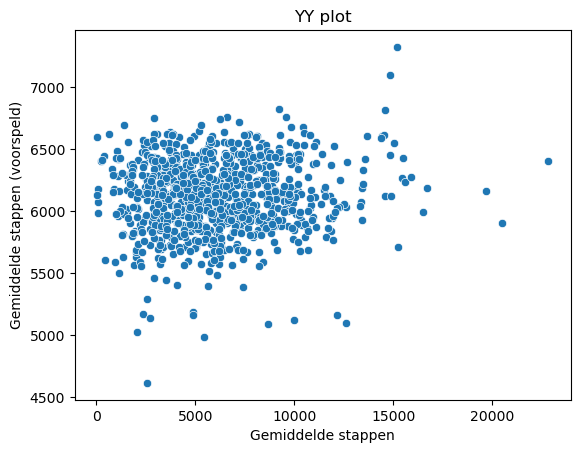

In [45]:
sns.scatterplot(x='gemiddelde_stappen',y='gemiddelde_stappen_p',data=df)
plt.xlabel('Gemiddelde stappen')
plt.ylabel('Gemiddelde stappen (voorspeld)')
plt.title('YY plot')
plt.show()

Te zien is dat de voorspellingen vooral bij de participanten met hoge waardes voor gemiddelde stappen ver boven de voorspelde gemiddelde stappen zitten.

# Conclusie

De data uit deze dataset correleert niet goed met elkaar. Hierdoor zijn de voorspellingen die gemaakt worden totaal niet accuraat.